

```
# This is formatted as code
```

1. Analyze and Preprocess data - Check if the dataset has missing values or has any other problem.
2. Feature Engineering
3. Divide the dataset into 2 training and test sets
4. Use logistic model Regression. Try to apply different *solver* and *penalty* to find the best one.
5. Perform model on training set and test set
6. Measure performance of the model.
7. Which metric is your main metric and why? Which solver and penalty have you chosen? (<= 100 words)

How can I measure your point:
1. Your function is callable and runs correctly
2. The performance of your model (in full pipeline) is acceptable. The final error based on my train and test set is low enough.
3. The data preprocessing is correct or make sense
4. The Feature engineering is correct or make sense
5. Any other additional process will be considered a small plus point.

- Age: This is the attribute that describes the age of the patient. There is data type $int64$, the highest value is 29, and the lowest is 77.
- Sex: This is the attribute indicating the gender of the patient, where 0 indicates male patient, 1 female patient.
- ChestPainType: This is the attribute that indicates the patient's chest pain level. With levels 0, 1, 2, and 3.
- RestingBP: This is the attribute that indicates the patient's blood pressure with data type $int64$, the value is in the range [94, 200]
- Cholesterol: This attribute indicates the patient's cholesterol level as measured in the hospital. Has the data type $int64$, where the value is in [126, 564]
- FastingBS: This is an attribute that describes the patient's fasting blood sugar. In which, if the patient has more than 120mg/dl sugar = 1, otherwise = 0.
- RestingECG: This property displays the results of the ECG from 0 to 2 (0, 1, 2). Where each value indicates the severity of the pain.
- thalach: Patient's highest heart rate
- MaxHR: Maximum heart rate achieved. Has data type $int64$, numeric value from 60 to 202.
- ExerciseAngina: Whether or not you have angina during exercise. Yes denotes 1, no denotes 0.
- Oldpeak: Attribute expressing the stress level of the patient. Has a value of type $float64$, the value is in [0, 6.2]
- ST\_Slope: Patient's condition during exercise. Includes [Upsloping, Flat, Down sloping] states that are sequentially digitized to [0, 1, 2].
- ca: number of major vessels (0-3) colored by flourosopy - given
- HeartDisease: Results of the patient's condition. 1 is for signs of heart disease, 0 is for no signs of heart disease.

## Load Dataset

[]

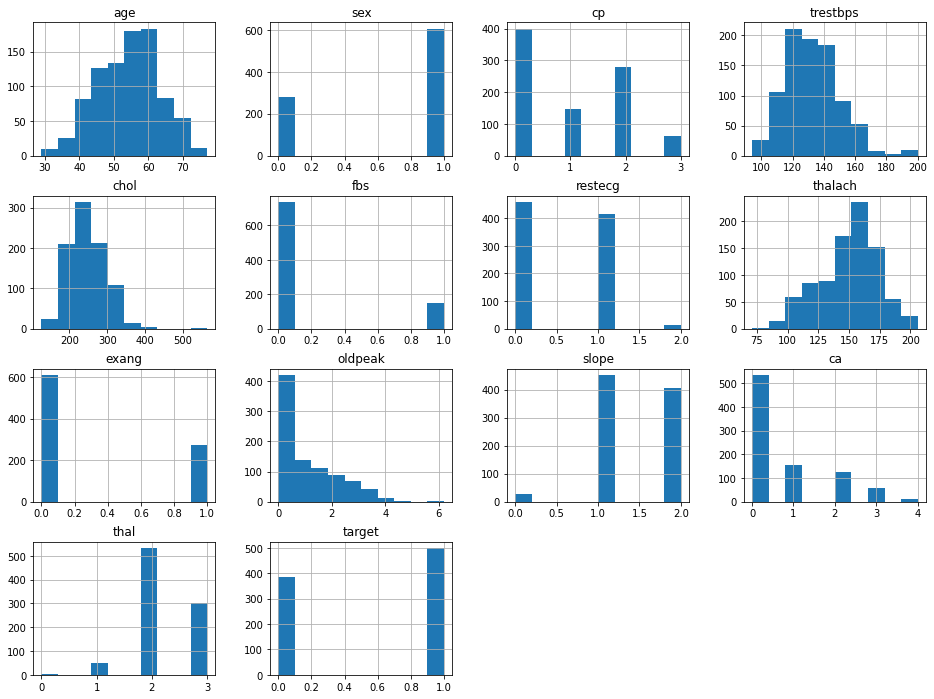

In [131]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
import warnings
warnings.filterwarnings("ignore")
PATH = "./heart.csv" # Path to your file

df = pd.read_csv(PATH)
#ToDo: Show histogram of dataframe
df.hist(figsize=(16, 12))
plt.plot()

## Data Analysis

In [132]:
# Data analysis
# Todo: analyze your data here
print('Data statistics')
# We can see that oldpeek features is quite skewed - we need to featue engineerring this feature
print(df.describe())
print('Number of null values in each feature:')
df.isnull().sum()

Data statistics
              age         sex          cp    trestbps        chol         fbs  \
count  886.000000  886.000000  886.000000  886.000000  886.000000  886.000000   
mean    54.007901    0.683973    1.005643  132.117381  247.497743    0.168172   
std      9.126292    0.465186    1.024542   16.807511   47.209995    0.374230   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.000000    0.000000    0.000000  120.000000  212.000000    0.000000   
50%     54.000000    1.000000    1.000000  130.000000  245.000000    0.000000   
75%     60.000000    1.000000    2.000000  140.000000  274.000000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  886.000000  886.000000  886.000000  886.000000  886.000000  886.000000   
mean     0.495485  149.492099    0.310384    1.083296    1.424379    0.714447   
std      0.

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<AxesSubplot:xlabel='target', ylabel='count'>

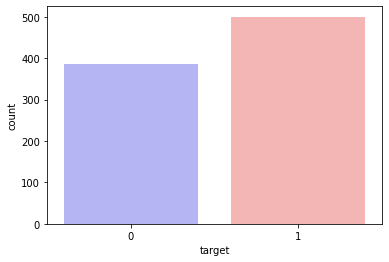

In [133]:
sns.countplot(x='target', data=df, palette='bwr')

<AxesSubplot:xlabel='count', ylabel='ca'>

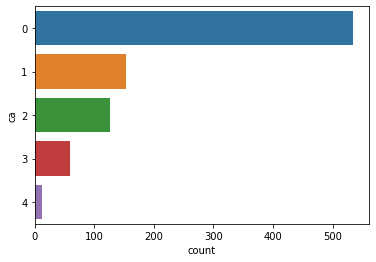

In [134]:
sns.countplot(y='ca', data=df)

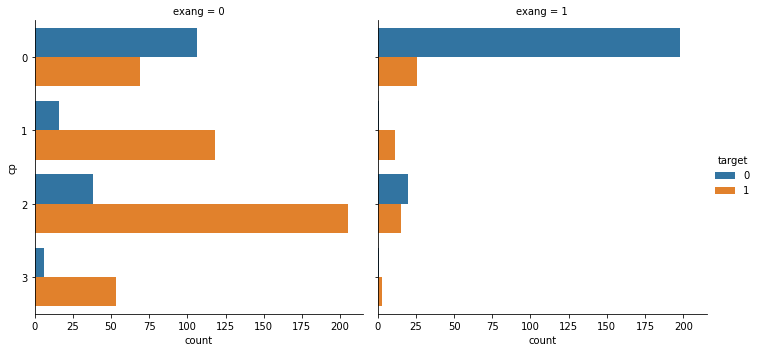

In [135]:
sns.catplot(y='cp', data=df, hue='target', col='exang', kind='count')

<AxesSubplot:xlabel='target', ylabel='count'>

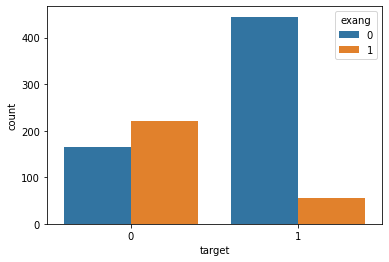

In [136]:
sns.countplot(data=df, x='target', hue='exang')

<AxesSubplot:>

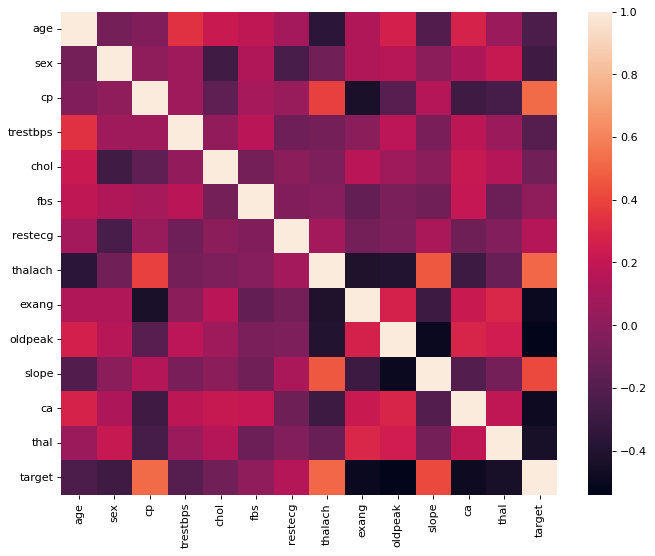

In [137]:
figure(figsize=(10, 8), dpi=80)
sns.heatmap(df.corr())

## Preprocessing

In [138]:
from sklearn.impute import SimpleImputer
def preprocessing_data(df):
    """
    Preprocess your data (eg. Drop null datapoints or fill missing data)
    :param df: pandas DataFrame
    :return: pandas DataFrame
    """
    # Todo: filling missing values with mean 
    null_values = df.isna().sum().sum()
    if null_values == 0:
        return df
    imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
    cols = df.columns
    df = imp_mean.fit_transform(df)
    df = pd.DataFrame(df, columns=cols)
    return df

In [139]:
df = preprocessing_data(df.copy())

## Feature Engineering

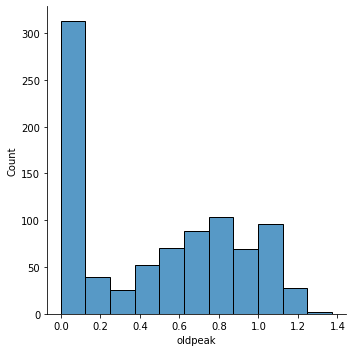

In [140]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, PowerTransformer
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import PolynomialFeatures

def apply_feature_engineering(df):
    """
    Apply all feature engineering to transform your data into number
    :param df: pandas DataFrame
    :return: pandas DataFrame
    """
    # Todo: 
    # - Remove skewed data using Box-cox transform
    # - 
    pt = PowerTransformer(standardize=False)
    continuous_cols = df.select_dtypes(include=['float64']).columns
    df[continuous_cols] = pt.fit_transform(df[continuous_cols].values)
    return df

df = apply_feature_engineering(df.copy())
sns.displot(df['oldpeak'])

<AxesSubplot:>

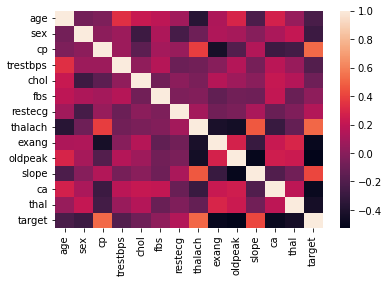

In [141]:
sns.heatmap(df.corr())

In [142]:
def prepare_X_y(df):
    """
    Feature engineering and create X and y
    :param df: pandas dataframe
    :return: (X, y) output feature matrix (dataframe), target (series)
    """
    # Todo: Split data into X and y (using sklearn train_test_split). Return two dataframes
    X = df.drop('target', axis=1, inplace=False)# Todo: Select features
    y = df['target']
    return X, y

X, y = prepare_X_y(df)

# Apply machine learning model

## Train-test split

In [143]:
from sklearn.model_selection import train_test_split
RANDOM_STATE = 42
TRAIN_SIZE = 0.7

trainX, testX ,trainY, testY = train_test_split(X, y, train_size=TRAIN_SIZE, random_state=RANDOM_STATE)

## Build SK-learn model

Best Penalty and solver combination result:
Penalty L1 and solver saga have best results with score: 0.93548 with std: 0.00883
Accuracy: 0.9210526315789473
Precision:  0.9281045751633987
Recall:  0.9342105263157895
F1:  0.9311475409836065
Confusion matrix: <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x0000021FE41BEEE0>
F1
Main metric Recall score: 0.9342105263157895
               precision    recall  f1-score   support

   No disease       0.91      0.90      0.91       114
Heart disease       0.93      0.93      0.93       152

     accuracy                           0.92       266
    macro avg       0.92      0.92      0.92       266
 weighted avg       0.92      0.92      0.92       266



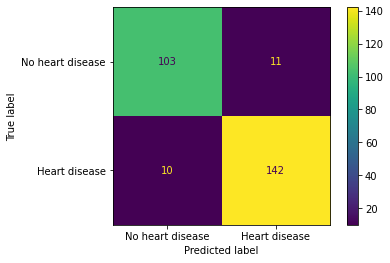

In [146]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV

def build_model(X, y, param_grid=None):
    """
    Design your model and train it (including your best params)
    :param X: feature matrix
    :param y: target
    :return: a model
    """
    
    # Todo: Input your scaler and logistic model into pipeline
    # Find best penalty and solver for logistic regression
    model = Pipeline([('scaler', StandardScaler()), ('logistic', LogisticRegression())])    
    # Todo: fit your model with X, y
    if param_grid is not None:
        param_grid = {"logistic__"+k: v for k, v in param_grid.items()}
        model = GridSearchCV(model, param_grid, cv=5)
        est = model.fit(X, y)
        df_best_hyperparams = pd.DataFrame(est.cv_results_)
        best_est = df_best_hyperparams[df_best_hyperparams['rank_test_score']==1].iloc[0, :]
        best_params = list(best_est['params'].values())
        mean_test_score = best_est['mean_test_score']
        std_test_score = best_est['std_test_score']
        print('Best Penalty and solver combination result:')
        print(f'Penalty {best_params[0].upper()} and solver {best_params[1]} have best results with score: {mean_test_score:.5f} with std: {std_test_score:.5f}')
#         print(df_best_hyperparams)
    else:
        model.fit(X, y)
    return model, best_params

def calculate_performance(y_true, y_pred):
    """
    :param y_true: ground truth values
    :param y_pred: predictions
    :return:
    """
    # Todo: return your error value like accuracy, f1score, ...
    confusion_mat = confusion_matrix(y_true , y_pred)
    cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_mat, display_labels = ['No heart disease', 'Heart disease'])
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision: ", precision_score(y_true , y_pred))
    print("Recall: ", recall_score(y_true , y_pred))
    print("F1: ", f1_score(y_true, y_pred))
    print("Confusion matrix:", cm_display.plot())
    print("F1", )
    # Todo: Only choose one of them as your score for the question 7
    main_score = recall_score(y_true, y_pred)
    return main_score
param_grid = {'penalty': ['l1', 'l2'],\
              'solver': ['lbfgs', 'saga', 'saga', 'liblinear']}
model, best_params = build_model(trainX, trainY, param_grid)
# Compare on training dataset
pred = model.predict(trainX)
pred = model.predict(testX)
target_names = ['No heart disease', 'Heart disease']
print(f'Main metric Recall score: {calculate_performance(testY, pred)}')
print(classification_report(testY, pred, target_names=target_names))

In [145]:
def get_conclusion():
    # Todo: Please return your answer, conclusion and opinion right here
    best_params_conclusion = f"Choosing penalties and solvers can be seen as Hyperparameter optimization problem so I ran grid search with 5-Fold cross validation to choose the best solver and penalty. The best performing combination was {best_params[0].upper()} penalty and {best_params[1]} solver."
    main_metric_conclusion = "7. Recall is my main metric for heart disease classification because missing a patient with heart disease (false negatives) can have more severe consequences than incorrectly diagnosing a patient have a heart disease (false positives). A high recall score indicates that the model can identify more patients with heart disease correctly."
    print(main_metric_conclusion)
    print(best_params_conclusion)
    
get_conclusion()

7. Recall is my main metric for heart disease classification because missing a patient with heart disease (false negatives) can have more severe consequences than incorrectly diagnosing a patient have a heart disease (false positives). A high recall score indicates that the model can identify more patients with heart disease correctly.
Choosing penalties and solvers can be seen as Hyperparameter optimization problem so I ran grid search with 5-Fold cross validation to choose the best solver and penalty. The best performing combination was L1 penalty and saga solver.
